In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_cherry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        46.7852 (33.4114, 62.3330) (32.9177, 61.6510) 28.7333 (Jnode 202)\n',
 't_n104        44.2248 (31.5466, 58.8438) (31.0726, 58.1848) 27.1122 (Jnode 201)\n',
 't_n105        43.5573 (31.0574, 57.9616) (30.7200, 57.4324) 26.7124 (Jnode 200)\n',
 't_n106        41.2016 (29.3594, 54.8219) (28.9069, 54.2382) 25.3314 (Jnode 199)\n',
 't_n107        39.0796 (27.8454, 52.0196) (27.3003, 51.3498) 24.0494 (Jnode 198)\n',
 't_n108        37.9991 (27.0768, 50.5889) (26.6275, 50.0409) 23.4134 (Jnode 197)\n',
 't_n109        36.0677 (25.6989, 48.0759) (25.4125, 47.6575) 22.2450 (Jnode 196)\n',
 't_n110        35.3443 (25.1960, 47.0890) (24.6186, 46.4147) 21.7961 (Jnode 195)\n',
 't_n111        31.7356 (22.5599, 42.3395) (22.0751, 41.7400) 19.6649 (Jnode 194)\n',
 't_n112        25.3759 (17.9626, 34.0170) (17.6746, 33.6505) 15.9760 (Jnode 193)\n',
 't_n113        22.6846 (16.0203, 30.4496) (15.7889, 30.1366) 14.3477 (Jnode 192)\n',
 't_n114        21.1479 (14.9001, 28.4828) (14.6779, 2

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[46.7852,
 44.2248,
 43.5573,
 41.2016,
 39.0796,
 37.9991,
 36.0677,
 35.3443,
 31.7356,
 25.3759,
 22.6846,
 21.1479,
 17.3287,
 13.6355,
 13.0359,
 17.5033,
 12.6929,
 26.6535,
 12.4981,
 22.4451,
 18.1277,
 12.7678,
 18.0236,
 29.6352,
 24.7128,
 16.8592,
 31.0822,
 25.5983,
 21.1337,
 16.7828,
 20.6133,
 17.0864,
 11.5329,
 22.2618,
 26.089,
 16.0538,
 34.6182,
 30.3596,
 27.1678,
 22.7206,
 17.1412,
 23.5072,
 19.779,
 15.4192,
 10.9531,
 31.2318,
 29.3931,
 26.5502,
 19.5487,
 38.9955,
 35.4101,
 31.5064,
 26.4991,
 34.6621,
 23.5416,
 30.2732,
 24.635,
 38.7973,
 32.5817,
 25.2331,
 22.623,
 19.7137,
 13.3014,
 15.2791,
 26.9291,
 18.1924,
 33.6342,
 46.3882,
 44.1923,
 41.6285,
 38.5744,
 35.9321,
 33.5025,
 31.1973,
 27.9846,
 22.9821,
 17.5065,
 12.3671,
 24.9427,
 19.7487,
 13.4377,
 15.6265,
 29.1119,
 25.8435,
 22.5574,
 18.4034,
 13.0971,
 25.7364,
 21.8531,
 15.1431,
 31.9167,
 27.2816,
 22.6075,
 17.3503,
 12.2322,
 26.0345,
 33.233,
 26.4447,
 16.4966,
 38.0027,
 27.8

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cherry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[42.3148,
 39.2384,
 38.2311,
 35.9138,
 35.0101,
 32.7664,
 24.5856,
 24.3708,
 23.4751,
 22.5096,
 21.5291,
 18.0102,
 12.3163,
 9.309,
 11.9082,
 16.6775,
 13.2231,
 22.2584,
 9.4447,
 15.7841,
 13.4194,
 7.2739,
 11.5459,
 20.9446,
 19.4828,
 10.8157,
 23.2922,
 21.4728,
 14.9396,
 12.4795,
 16.7265,
 12.1706,
 10.1596,
 13.4469,
 30.4402,
 22.0653,
 33.4194,
 30.5735,
 26.5588,
 21.584,
 16.3028,
 20.2655,
 16.2684,
 11.5979,
 9.6441,
 28.1865,
 25.6533,
 15.0369,
 8.5149,
 36.2494,
 31.6739,
 21.5896,
 14.0472,
 27.2622,
 12.2587,
 20.1878,
 11.472,
 38.5491,
 35.4129,
 27.4651,
 17.7637,
 15.8594,
 12.9426,
 10.2843,
 29.4707,
 15.4436,
 23.1233,
 31.0661,
 29.6533,
 28.4786,
 27.224,
 25.1541,
 24.2615,
 23.2594,
 22.1317,
 20.1493,
 17.4766,
 11.9183,
 16.1552,
 11.6239,
 10.2799,
 10.3239,
 21.9203,
 19.9104,
 18.8139,
 16.1503,
 10.4578,
 19.1114,
 16.492,
 10.6505,
 23.9194,
 21.6222,
 14.5477,
 13.0465,
 4.3171,
 13.0305,
 18.2854,
 15.5243,
 9.1252,
 29.9232,
 16.7706]

In [12]:
posterior_mean_iqtree

[46.7852,
 44.2248,
 43.5573,
 41.2016,
 39.0796,
 37.9991,
 36.0677,
 35.3443,
 31.7356,
 25.3759,
 22.6846,
 21.1479,
 17.3287,
 13.6355,
 13.0359,
 17.5033,
 12.6929,
 26.6535,
 12.4981,
 22.4451,
 18.1277,
 12.7678,
 18.0236,
 29.6352,
 24.7128,
 16.8592,
 31.0822,
 25.5983,
 21.1337,
 16.7828,
 20.6133,
 17.0864,
 11.5329,
 22.2618,
 26.089,
 16.0538,
 34.6182,
 30.3596,
 27.1678,
 22.7206,
 17.1412,
 23.5072,
 19.779,
 15.4192,
 10.9531,
 31.2318,
 29.3931,
 26.5502,
 19.5487,
 38.9955,
 35.4101,
 31.5064,
 26.4991,
 34.6621,
 23.5416,
 30.2732,
 24.635,
 38.7973,
 32.5817,
 25.2331,
 22.623,
 19.7137,
 13.3014,
 15.2791,
 26.9291,
 18.1924,
 33.6342,
 46.3882,
 44.1923,
 41.6285,
 38.5744,
 35.9321,
 33.5025,
 31.1973,
 27.9846,
 22.9821,
 17.5065,
 12.3671,
 24.9427,
 19.7487,
 13.4377,
 15.6265,
 29.1119,
 25.8435,
 22.5574,
 18.4034,
 13.0971,
 25.7364,
 21.8531,
 15.1431,
 31.9167,
 27.2816,
 22.6075,
 17.3503,
 12.2322,
 26.0345,
 33.233,
 26.4447,
 16.4966,
 38.0027,
 27.8

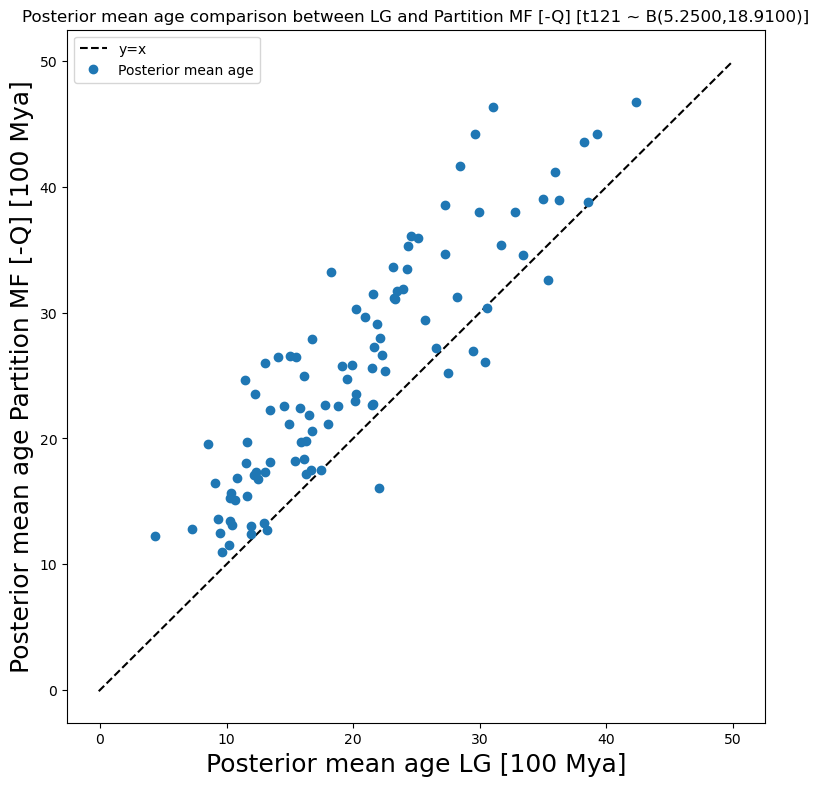

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t121 ~ B(5.2500,18.9100)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_Q_cherry_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')